In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 이미지 읽어오기

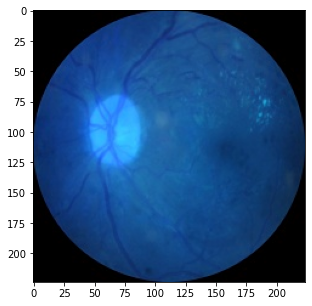

In [8]:
img = cv2.imread("Data/data_ (4).jpg", 1)
plt.figure(0, figsize=(5, 5))
plt.imshow(img)
plt.show()

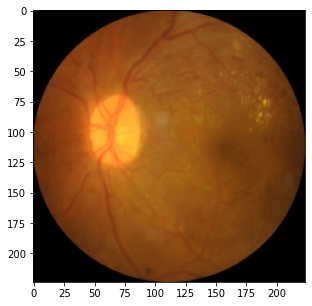

In [9]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(0, figsize=(5, 5))
plt.imshow(img)
plt.show()

# 2. 데이터 전처리
## 2.1. 흑백 이미지

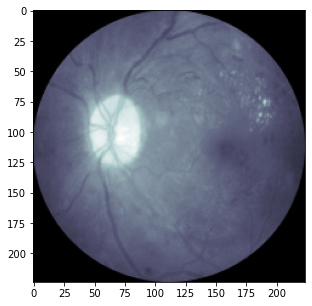

In [14]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.figure(0, figsize=(5, 5))
plt.imshow(gray_img, cmap=plt.cm.bone)
plt.show()

## 2.2. 스무딩 or 블러링
### 중간값 필터 사용하여 블러링 (median filter)

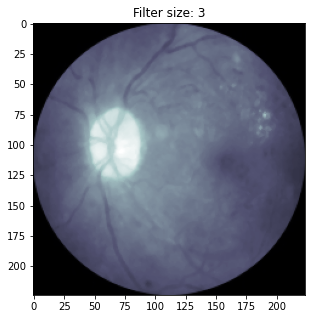

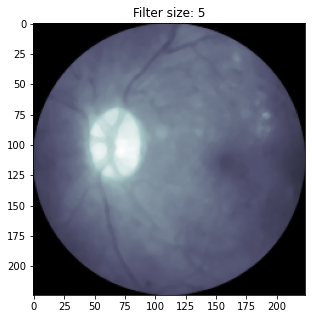

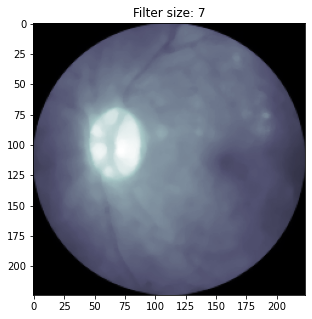

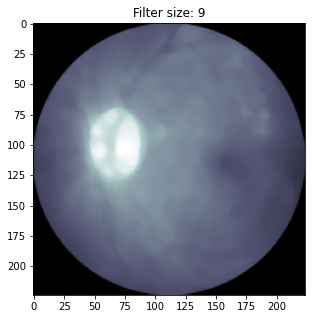

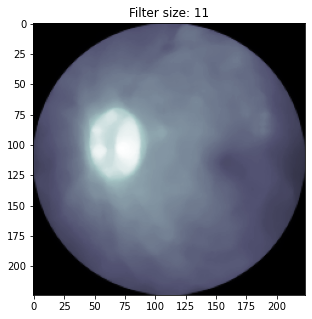

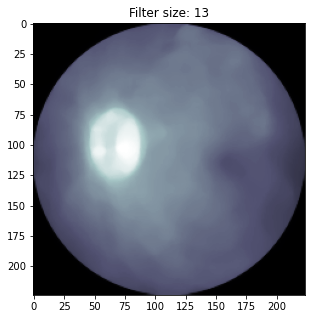

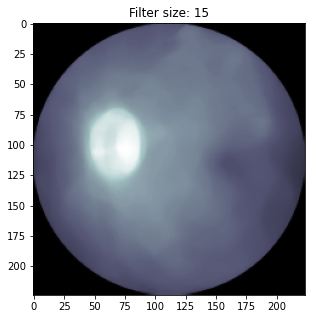

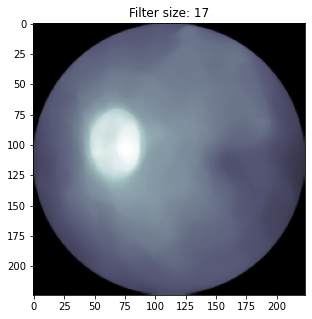

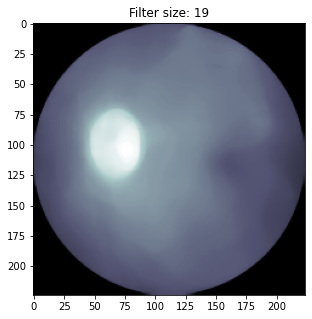

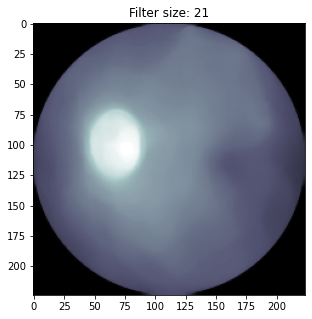

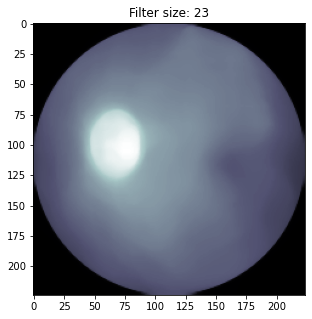

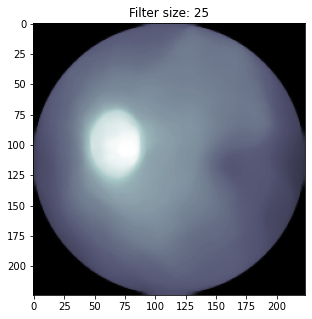

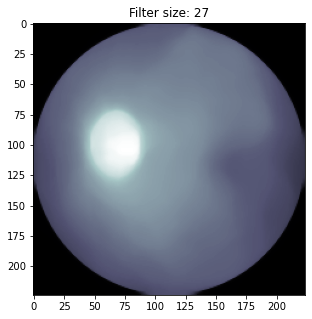

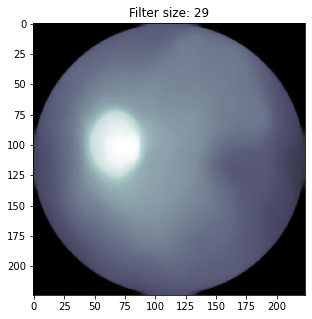

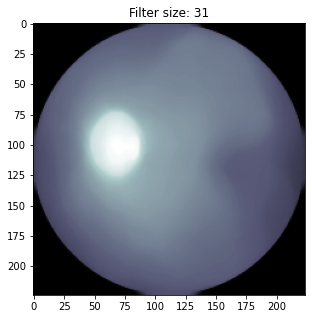

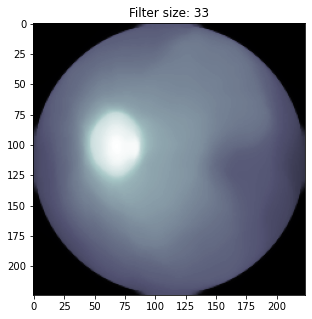

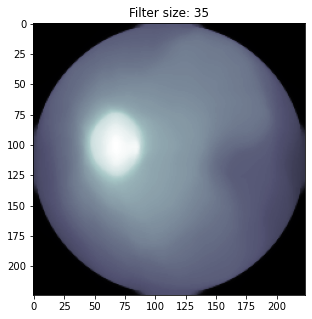

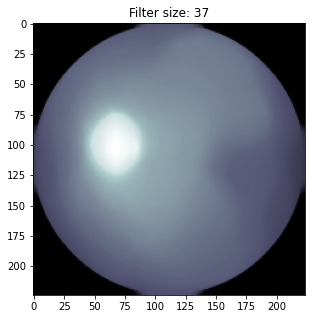

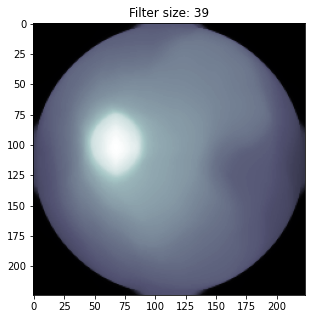

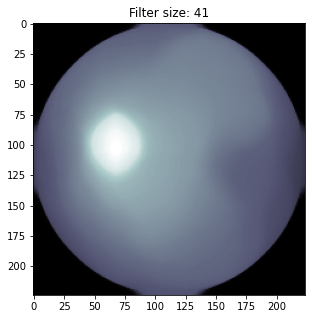

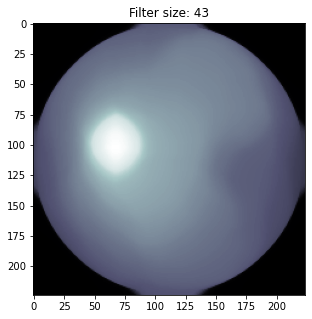

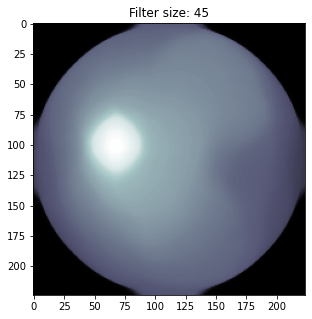

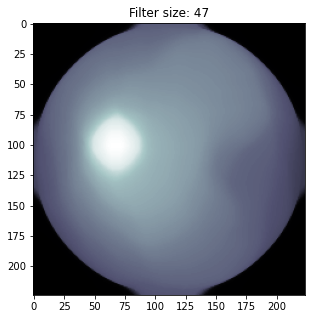

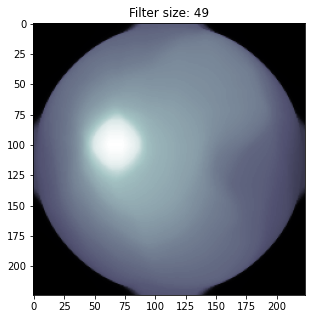

In [23]:
# 필터 사이즈에 따른 블러링 정도 확인
# 단, 필터 사이즈는 홀수!
for size in range(3, 50, 2):
    blurred_img = cv2.medianBlur(gray_img,  size)
    plt.figure(size, figsize=(5, 5))
    plt.imshow(blurred_img, cmap=plt.cm.bone)
    plt.title(f"Filter size: {size}")
    plt.show()

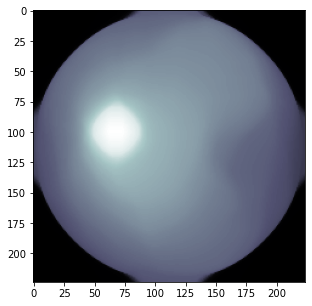

In [24]:
# 최적의 중간값 필터 사이즈는 49로 선정하여 진행할 예정
blurred_img = cv2.medianBlur(gray_img,  49)
plt.figure(size, figsize=(5, 5))
plt.imshow(blurred_img, cmap=plt.cm.bone)
plt.show()

## 2.3. 원본 흑백 사진에서 블러링된 이미지 제거 --> Edge정보 제거

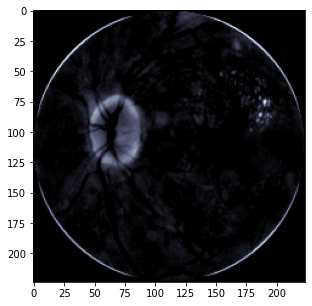

In [25]:
subtracted_img = cv2.addWeighted(gray_img, 1, blurred_img , -1, 0)
plt.figure(figsize=(5, 5))
plt.imshow(subtracted_img, cmap=plt.cm.bone)
plt.show()

## 2.3. 모폴로지 기법 활용: Opening and closing 반복
### 반지름이 2, 4, 6, 8이 원형 모양 커널을 통해 모폴로지 기법 반복적 적용

In [33]:
def morp(img):
    for radius in [2, 4, 6, 8]:
        circle = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2*radius, 2*radius))
        result = cv2.morphologyEx(img, cv2.MORPH_OPEN, circle)
        result = cv2.morphologyEx(result, cv2.MORPH_CLOSE, circle)
    return result

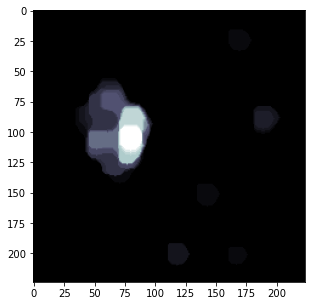

In [35]:
morp_img = morp(subtracted_img)
plt.figure(figsize=(5, 5))
plt.imshow(morp_img, cmap=plt.cm.bone)
plt.show()

## 2.4. 가장  밝은 부분 위치 찾기

In [36]:
np.argmax(morp_img)

21578

In [37]:
def argmax_2arr_index(argmax, columns):
    return argmax // columns, argmax % columns

가장 밝은 값: 22
가장 밝은 값 좌표: (96, 74) --> 해당 위치 값: 22


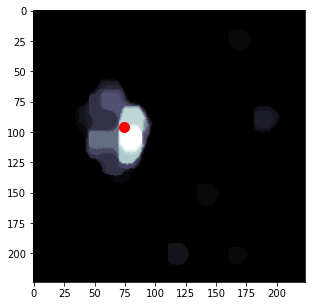

In [44]:
x, y = argmax_2arr_index(np.argmax(morp_img), morp_img.shape[1])
print(f"가장 밝은 값: {np.max(morp_img)}")
print(f"가장 밝은 값 좌표: ({x}, {y}) --> 해당 위치 값: {morp_img[x, y]}")
plt.figure(figsize=(5, 5))
plt.imshow(morp_img, cmap=plt.cm.bone)
plt.scatter(y, x,
            marker='o',
            s=100,
            c='red',
           )
plt.show()

## 2.5. 실제 데이터에서 위치 확인

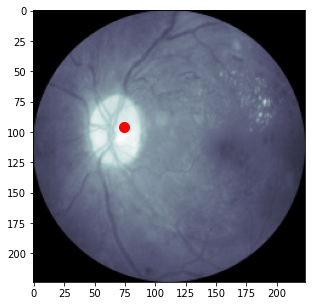

In [45]:
plt.figure(figsize=(5, 5))
plt.imshow(gray_img, cmap=plt.cm.bone)
plt.scatter(y, x,
            marker='o',
            s=100,
            c='red',
           )
plt.show()